In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
publications = pd.read_csv('data/AI publication time series by country.csv')
publications

,Year,Country,Value
0,1980,United States,968.342857
1,1981,United States,1005.795055
2,1982,United States,1126.416667
3,1983,United States,1182.773810
4,1984,United States,1259.638095
...,...,...,...
413,2017,Korea,379.168402
414,2018,Korea,412.362916
415,2019,Korea,464.850398
416,2020,Korea,392.591043


In [5]:
publications[publications['Year']==2021].sort_values(by='Value', ascending=False)

,Year,Country,Value
41,2021,United States,22156.727940
83,2021,EU (27),5488.334581
123,2021,China,4692.707446
165,2021,United Kingdom,3388.005031
207,2021,Canada,1623.426216
249,2021,Australia,928.824100
291,2021,Japan,656.794669
333,2021,India,415.323855
375,2021,Switzerland,410.348885
417,2021,Korea,245.066072


In [6]:
breakout_countries = ['United States', 'China', 'United Kingdom', 'EU (27)']
def countries_of_interest(df):
    return df \
        .set_index('Country') \
        .groupby(by=lambda r: r if r in breakout_countries else 'None of the above') \
        .agg({'Year': 'first', 'Value': 'sum'}) \
        .reset_index() \
        .sort_values(by='Value', ascending=False)
    
countries_of_interest(publications[publications['Year']==2021])

,Country,Year,Value
4,United States,2021,22156.727940
1,EU (27),2021,5488.334581
0,China,2021,4692.707446
2,None of the above,2021,4279.783797
3,United Kingdom,2021,3388.005031


it doesn't really make sense to treat the rest of the world like one country. oops

We need a model for how this changes over time, so we can get a probability distribution for 2022. Let's look at the trends

Country
China             AxesSubplot(0.125,0.125;0.775x0.755)
EU (27)           AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom    AxesSubplot(0.125,0.125;0.775x0.755)
United States     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Value, dtype: object

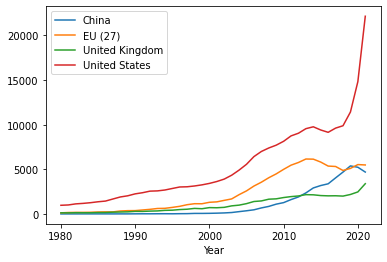

In [7]:
publications[publications['Country'].isin(breakout_countries)] \
    .set_index('Year') \
    .groupby('Country')['Value'] \
    .plot(legend=True)

looks linear within the last 5 years

Turns out I have no idea to get the probability of being in a particular rank out of a linear regression

In [8]:
by_country = pd.pivot_table(publications, index='Year', columns='Country', values='Value')
by_country

Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
Year,,,,,,,,,,
1980,27.166667,78.950000,1.142857,122.259524,6.833333,41.083333,3.000000,8.973810,124.297619,968.342857
1981,24.583333,76.916667,NaN,159.020513,5.564103,54.353846,3.000000,18.285714,117.666667,1005.795055
1982,37.466667,74.850000,NaN,171.966667,8.833333,37.208333,2.875000,13.416667,137.666667,1126.416667
1983,29.366667,72.577381,2.700000,172.414286,6.333333,44.666667,4.000000,13.960714,134.190476,1182.773810
1984,40.033333,89.600000,3.333333,185.253968,8.700000,60.833333,8.333333,13.883333,131.170635,1259.638095
1985,41.166667,118.476191,3.000000,216.116667,8.416667,49.650000,1.000000,10.934524,154.000000,1362.513095
1986,50.755556,121.219048,2.833333,230.049242,12.333333,55.125000,3.500000,15.700000,157.564141,1439.960823
1987,41.500000,145.566667,1.833333,227.258547,16.833333,59.750000,7.500000,16.294231,196.208333,1672.077778
1988,49.616667,160.954545,4.416667,329.643173,6.250000,64.864044,5.250000,17.958333,214.950287,1900.820093


In [9]:
country = 'United States'
X = by_country[country]
X

Year
1980      968.342857
1981     1005.795055
1982     1126.416667
1983     1182.773810
1984     1259.638095
1985     1362.513095
1986     1439.960823
1987     1672.077778
1988     1900.820093
1989     2031.898810
1990     2248.487440
1991     2378.492350
1992     2553.835909
1993     2582.267607
1994     2680.209900
1995     2851.211324
1996     3019.147664
1997     3043.193334
1998     3132.580398
1999     3257.926054
2000     3420.697924
2001     3632.245315
2002     3904.792605
2003     4338.720471
2004     4911.588326
2005     5563.034962
2006     6424.908899
2007     6998.740152
2008     7390.731745
2009     7706.500219
2010     8140.718871
2011     8746.132586
2012     9045.870507
2013     9555.872514
2014     9766.082609
2015     9408.238645
2016     9147.323848
2017     9618.036710
2018     9884.411310
2019    11422.581150
2020    14828.062780
2021    22156.727940
Name: United States, dtype: float64

In [10]:
from statsmodels.tsa.forecasting.theta import ThetaModel
model = ThetaModel(X, deseasonalize=False)
results = model.fit()
results.prediction_intervals().join(results.forecast())

,lower,upper,forecast
2022,20471.622304,24160.896955,22316.25963


there doesn't seem to be a good way to get the standard error for a theta model and I'm not deseasonailizing which seems to be the main reason to use a theta model. Let's try something else

In [11]:
model = sm.tsa.SARIMAX(X)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06488D+01    |proj g|=  3.92616D+01

At iterate    5    f=  9.22083D+00    |proj g|=  5.09647D-01

At iterate   10    f=  8.78100D+00    |proj g|=  2.40517D-02

At iterate   15    f=  8.73676D+00    |proj g|=  6.25130D-04

At iterate   20    f=  8.68862D+00    |proj g|=  6.63173D-04

At iterate   25    f=  8.66454D+00    |proj g|=  6.68354D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     25     31      1     0     0   

/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


In [12]:
forecast_results = results.get_forecast()
forecast_results.summary_frame()

/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


United States,mean,mean_se,mean_ci_lower,mean_ci_upper
42,22066.917285,1323.278265,19473.339545,24660.495025


let's try a simulation based approach

In [22]:
def get_mean_se(ser):
    model = sm.tsa.ARIMA(ser)
    results = model.fit()
    forecast_results = results.get_forecast()
    summary = forecast_results.summary_frame()
    return pd.Series({
        "mean": summary["mean"].iloc[0],
        "mean_se": summary["mean_se"].iloc[0]
    })

distributions = by_country.apply(get_mean_se)

/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/jonah/.virtualenvs/infer-pub/lib/python3.9/site-packages/stats

In [23]:
distributions

Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
mean,360.609548,524.753718,1125.901590,2416.182604,204.561157,259.139459,152.289732,173.199574,1035.127155,5421.657361
mean_se,336.304616,402.459813,1680.137683,2214.796612,245.780615,190.522465,163.969108,159.783186,856.525345,4317.590231


In [24]:
samples = distributions.apply(lambda s: np.random.normal(s['mean'], s['mean_se'], 10000))
samples

Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
0,343.389890,523.051099,1864.297580,1278.193752,10.195139,311.850770,205.266466,184.896856,1084.103846,5265.897027
1,13.409580,1061.850759,1721.229540,4266.878744,134.507296,243.914895,201.730195,459.250489,573.847175,-729.315664
2,300.859084,427.684875,4140.117166,-2708.069138,-359.383853,141.188351,68.955214,65.769761,1206.549432,-5252.998581
3,244.852818,450.022272,1292.756842,2894.189802,545.170204,282.795181,372.016130,191.447675,2205.165729,4930.942555
4,643.040900,143.131955,2895.670504,-2435.706711,-204.571688,301.398191,10.443959,-89.532068,1575.662973,10640.508840
...,...,...,...,...,...,...,...,...,...,...
9995,337.809548,345.903965,-10.455613,2040.910546,-35.150429,541.727091,241.099163,304.450846,1071.154213,10641.687407
9996,144.660669,336.495723,-270.219139,996.839672,496.673768,425.347387,280.443340,332.934570,851.765449,7635.227011
9997,-263.023038,435.797372,358.570812,1654.623158,140.499751,188.535993,73.550926,110.292592,1680.942958,14477.955667
9998,-635.739292,668.346364,1900.852632,735.010348,242.957419,477.911804,309.075869,7.004788,1203.134173,9530.978462


In [25]:
second_place = samples.apply(lambda s: s.sort_values(ascending=False).index[1], axis=1)
second_place

0                China
1                China
2       United Kingdom
3              EU (27)
4                China
             ...      
9995           EU (27)
9996           EU (27)
9997    United Kingdom
9998             China
9999           EU (27)
Length: 10000, dtype: object

<AxesSubplot:>

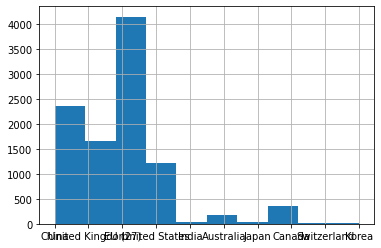

In [45]:
second_place.hist()

In [49]:
counts = second_place.value_counts()
counts /= counts.sum()
counts

EU (27)           0.4139
China             0.2354
United Kingdom    0.1645
United States     0.1218
Canada            0.0363
Australia         0.0181
Japan             0.0041
India             0.0037
Korea             0.0013
Switzerland       0.0009
dtype: float64

In [50]:
counts[breakout_countries]

United States     0.1218
China             0.2354
United Kingdom    0.1645
EU (27)           0.4139
dtype: float64